In [1]:
from google.colab import files
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)

# Show the first 50 rows
df.head()

Saving Heart Attack.csv to Heart Attack (1).csv
User uploaded file "Heart Attack (1).csv" with length 52355 bytes


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
# Display Mean of each feature
print("📊 Mean:")
print(df.mean(numeric_only=True))

# Display Median of each feature
print("\n📊 Median:")
print(df.median(numeric_only=True))

# Display Standard Deviation of each feature
print("\n📊 Standard Deviation:")
print(df.std(numeric_only=True))

📊 Mean:
Age                          56.191812
Gender                        0.659591
Heart rate                   78.336619
Systolic blood pressure     127.170584
Diastolic blood pressure     72.269143
Blood sugar                 146.634344
CK-MB                        15.274306
Troponin                      0.360942
dtype: float64

📊 Median:
Age                          58.000
Gender                        1.000
Heart rate                   74.000
Systolic blood pressure     124.000
Diastolic blood pressure     72.000
Blood sugar                 116.000
CK-MB                         2.850
Troponin                      0.014
dtype: float64

📊 Standard Deviation:
Age                         13.647315
Gender                       0.474027
Heart rate                  51.630270
Systolic blood pressure     26.122720
Diastolic blood pressure    14.033924
Blood sugar                 74.923045
CK-MB                       46.327083
Troponin                     1.154568
dtype: float64


In [4]:
#Basic Information
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Column names and data types
df.info()

# Summary statistics
df.describe()

Dataset Shape: (1319, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [5]:
# Check for missing/null values
print("Missing Values in Dataset:")
print(df.isnull().sum())

Missing Values in Dataset:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


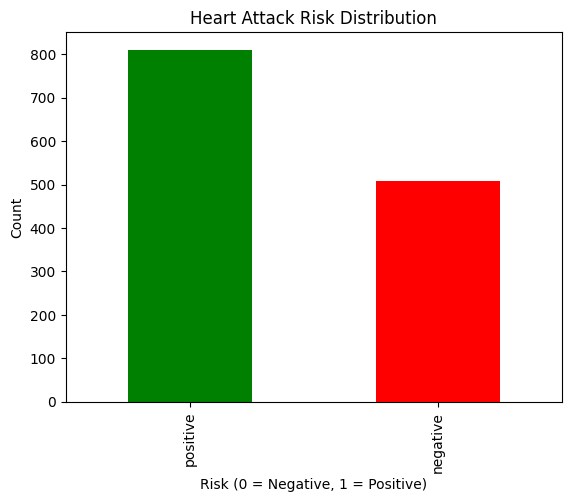

In [6]:
# Count values in target column
df['Result'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Heart Attack Risk Distribution")
plt.xlabel("Risk (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

In [7]:
# Check and remove duplicates
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate Rows: 0


In [8]:
#Define input features (X) & target variable (y)
X=df.drop('Result',axis=1)
y=df['Result']

In [9]:
# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (791, 8)
Shape of y_train: (791,)
Shape of X_val: (264, 8)
Shape of y_val: (264,)
Shape of X_test: (264, 8)
Shape of y_test: (264,)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train)

# Transform all sets using the same scaler
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [12]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation data
y_val_pred_lr = lr_model.predict(X_val_scaled)

# Evaluate the model on the validation data
print("Logistic Regression - Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lr))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_lr))

# Make predictions on the scaled test data
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model on the test data
print("\nLogistic Regression - Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_lr))
cm_test_lr = confusion_matrix(y_test, y_test_pred_lr) # Store confusion matrix
print("\nConfusion Matrix:\n", cm_test_lr)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_lr))

Logistic Regression - Validation Set Evaluation:
Accuracy: 0.7689393939393939

Confusion Matrix:
 [[ 76  30]
 [ 31 127]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.72      0.71       106
    positive       0.81      0.80      0.81       158

    accuracy                           0.77       264
   macro avg       0.76      0.76      0.76       264
weighted avg       0.77      0.77      0.77       264


Logistic Regression - Test Set Evaluation:
Accuracy: 0.7878787878787878

Confusion Matrix:
 [[ 71  26]
 [ 30 137]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.73      0.72        97
    positive       0.84      0.82      0.83       167

    accuracy                           0.79       264
   macro avg       0.77      0.78      0.77       264
weighted avg       0.79      0.79      0.79       264



In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train)

# Transform all sets using the same scaler
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [14]:
# Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation data
y_val_pred_svm = svm_model.predict(X_val_scaled)

# Evaluate the model on the validation data
print("SVM - Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred_svm))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_svm))

# Make predictions on the scaled test data
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model on the test data
print("\nSVM - Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_svm))
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm) # Store confusion matrix
print("\nConfusion Matrix:\n", cm_test_svm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_svm))

SVM - Validation Set Evaluation:
Accuracy: 0.7310606060606061

Confusion Matrix:
 [[ 70  36]
 [ 35 123]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.66      0.66       106
    positive       0.77      0.78      0.78       158

    accuracy                           0.73       264
   macro avg       0.72      0.72      0.72       264
weighted avg       0.73      0.73      0.73       264


SVM - Test Set Evaluation:
Accuracy: 0.7083333333333334

Confusion Matrix:
 [[ 56  41]
 [ 36 131]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.61      0.58      0.59        97
    positive       0.76      0.78      0.77       167

    accuracy                           0.71       264
   macro avg       0.69      0.68      0.68       264
weighted avg       0.71      0.71      0.71       264



In [15]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier()

# Train the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation data
y_val_pred_knn = knn_model.predict(X_val_scaled)

# Evaluate the model on the validation data
print("KNN - Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred_knn))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_knn))

# Make predictions on the scaled test data
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model on the test data
print("\nKNN - Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_knn))
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn) # Store confusion matrix
print("\nConfusion Matrix:\n", cm_test_knn)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_knn))

KNN - Validation Set Evaluation:
Accuracy: 0.625

Confusion Matrix:
 [[ 60  46]
 [ 53 105]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.53      0.57      0.55       106
    positive       0.70      0.66      0.68       158

    accuracy                           0.62       264
   macro avg       0.61      0.62      0.61       264
weighted avg       0.63      0.62      0.63       264


KNN - Test Set Evaluation:
Accuracy: 0.6325757575757576

Confusion Matrix:
 [[ 52  45]
 [ 52 115]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      0.54      0.52        97
    positive       0.72      0.69      0.70       167

    accuracy                           0.63       264
   macro avg       0.61      0.61      0.61       264
weighted avg       0.64      0.63      0.64       264



In [16]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation data
y_val_pred_dt = dt_model.predict(X_val_scaled)

# Evaluate the model on the validation data
print("Decision Tree - Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dt))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_dt))

# Make predictions on the scaled test data
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model on the test data
print("\nDecision Tree - Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_dt))
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt) # Store confusion matrix
print("\nConfusion Matrix:\n", cm_test_dt)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_dt))

Decision Tree - Validation Set Evaluation:
Accuracy: 0.9772727272727273

Confusion Matrix:
 [[103   3]
 [  3 155]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.97      0.97      0.97       106
    positive       0.98      0.98      0.98       158

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264


Decision Tree - Test Set Evaluation:
Accuracy: 0.9886363636363636

Confusion Matrix:
 [[ 95   2]
 [  1 166]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.99      0.98      0.98        97
    positive       0.99      0.99      0.99       167

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264




--- Test Set Evaluation Summary ---

Logistic Regression:
  Accuracy: 0.7879
  Precision: 0.8405
  Recall: 0.8204
  F1-score: 0.8303
  Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.73      0.72        97
    positive       0.84      0.82      0.83       167

    accuracy                           0.79       264
   macro avg       0.77      0.78      0.77       264
weighted avg       0.79      0.79      0.79       264

  Confusion Matrix:
[[ 71  26]
 [ 30 137]]

SVM:
  Accuracy: 0.7083
  Precision: 0.7616
  Recall: 0.7844
  F1-score: 0.7729
  Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.58      0.59        97
    positive       0.76      0.78      0.77       167

    accuracy                           0.71       264
   macro avg       0.69      0.68      0.68       264
weighted avg       0.71      0.71      0.71       264

  Confusion Matrix:
[[ 56  41]
 [ 36 1

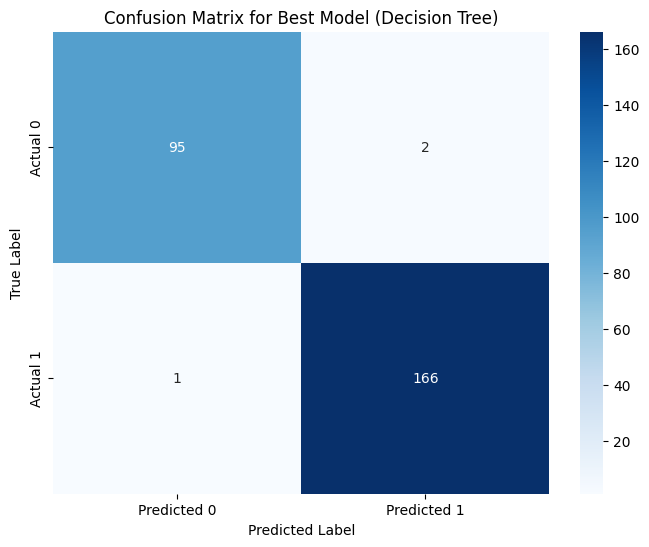

In [17]:
# Evaluate models
models = {
    "Logistic Regression": (lr_model, y_test_pred_lr, cm_test_lr),
    "SVM": (svm_model, y_test_pred_svm, cm_test_svm),
    "KNN": (knn_model, y_test_pred_knn, cm_test_knn),
    "Decision Tree": (dt_model, y_test_pred_dt, cm_test_dt)
}

best_model_name = None
best_accuracy = 0
best_cm = None
best_y_pred = None

print("\n--- Test Set Evaluation Summary ---")
for name, (model, y_pred, cm) in models.items():
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='positive')
  recall = recall_score(y_test, y_pred, pos_label='positive')
  f1 = f1_score(y_test, y_pred, pos_label='positive')
  report = classification_report(y_test, y_pred)

  print(f"\n{name}:")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print(f"  F1-score: {f1:.4f}")
  print(f"  Classification Report:\n{report}")
  print(f"  Confusion Matrix:\n{cm}")

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model_name = name
    best_cm = cm
    best_y_pred = y_pred

print(f"\n--- Best Model on Test Set ): {best_model_name} ---")
print(f"Best Accuracy: {best_accuracy:.4f}")
print("\nConfusion Matrix of the Best Model:")
print(best_cm)
print("\nClassification Report of the Best Model:")
print(classification_report(y_test, best_y_pred))
print("\nPrecision Score of the Best Model:", precision_score(y_test, best_y_pred, pos_label='positive'))
print("\nRecall Score of the Best Model:", recall_score(y_test, best_y_pred, pos_label='positive'))
print("\nF1-score of the Best Model:", f1_score(y_test, best_y_pred, pos_label='positive'))

# Plot the confusion matrix of the best model
plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for Best Model ({best_model_name})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

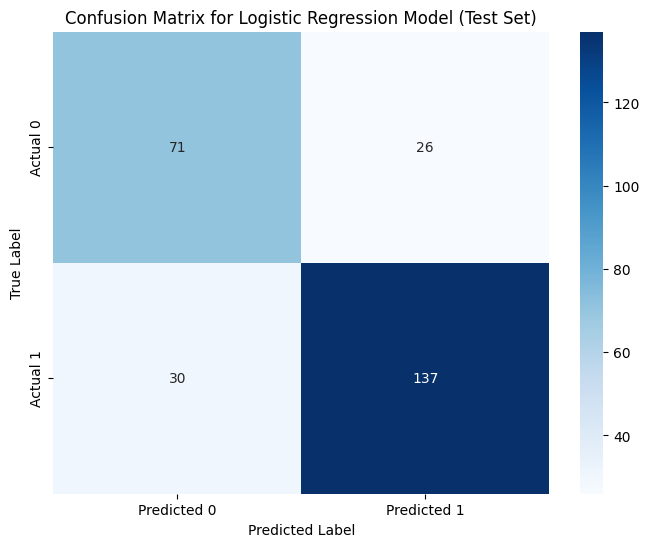

In [ ]:
# Confusion matrix for the Logistic Regression model on the test set
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression Model (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


KNN - Test Set Evaluation:
Accuracy: 0.6326
Precision: 0.7188
Recall: 0.6886
F1-score: 0.7034
Classification Report:
              precision    recall  f1-score   support

    negative       0.50      0.54      0.52        97
    positive       0.72      0.69      0.70       167

    accuracy                           0.63       264
   macro avg       0.61      0.61      0.61       264
weighted avg       0.64      0.63      0.64       264

Confusion Matrix:
[[ 52  45]
 [ 52 115]]


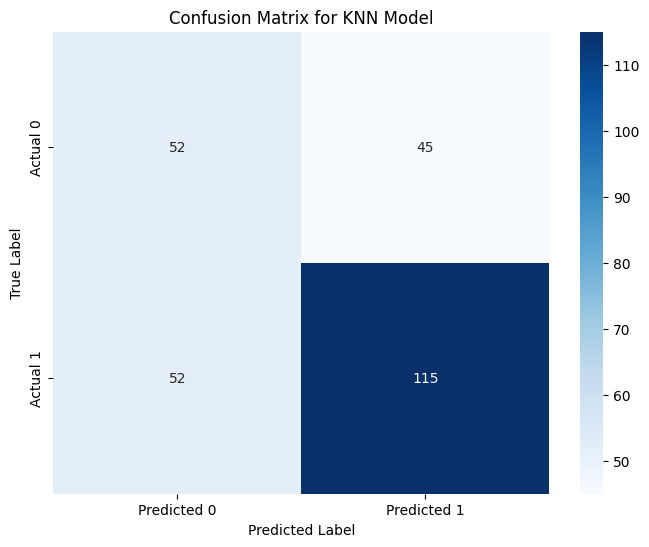

In [18]:
# Evaluate KNN on the test set
print("\nKNN - Test Set Evaluation:")
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
report_knn = classification_report(y_test, y_test_pred_knn)
precision_knn = precision_score(y_test, y_test_pred_knn, pos_label='positive')
recall_knn = recall_score(y_test, y_test_pred_knn, pos_label='positive')
f1_knn = f1_score(y_test, y_test_pred_knn, pos_label='positive')

print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")
print(f"Classification Report:\n{report_knn}")
print(f"Confusion Matrix:\n{cm_test_knn}")

# Plot the confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- SVM Confusion Matrix and Metrics ---

Confusion Matrix:
 [[ 56  41]
 [ 36 131]]

Accuracy Score: 0.7083

Precision Score: 0.7616

Recall Score: 0.7844

F1-score: 0.7729


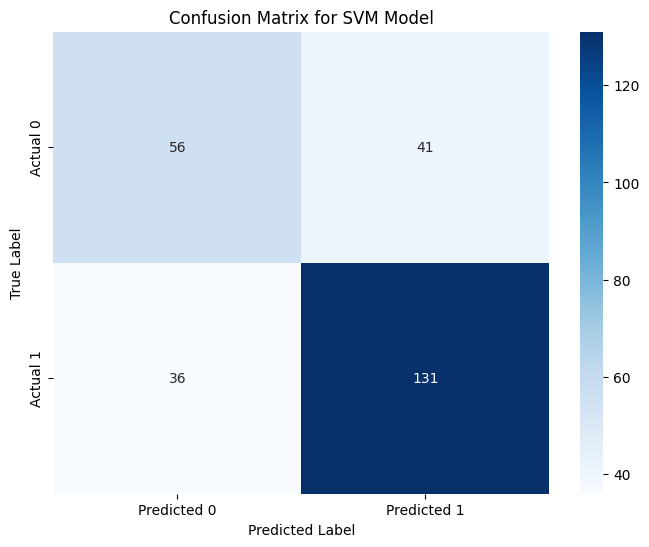

In [19]:
# Define the confusion matrix and related metrics for SVM
print("\n--- SVM Confusion Matrix and Metrics ---")

# Get the confusion matrix for the SVM model on the test set
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
print("\nConfusion Matrix:\n", cm_svm)

# Calculate the accuracy score for SVM
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"\nAccuracy Score: {accuracy_svm:.4f}")

# Calculate the precision score for SVM
# Use zero_division parameter to handle cases where there are no predicted positive samples
precision_svm = precision_score(y_test, y_test_pred_svm, pos_label='positive', zero_division=1)
print(f"\nPrecision Score: {precision_svm:.4f}")

# Calculate the recall score for SVM
recall_svm = recall_score(y_test, y_test_pred_svm, pos_label='positive')
print(f"\nRecall Score: {recall_svm:.4f}")

# Calculate the F1-score for SVM
f1_svm = f1_score(y_test, y_test_pred_svm, pos_label='positive')
print(f"\nF1-score: {f1_svm:.4f}")

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()